# 코로나
* fbprophet 설치 : https://www.python2.net/questions-13349.htm
* https://www.egbiz.or.kr/prjCategory/a/m/selectPrjView.do?prjDegreeId=PD000000019032

* 지역별로 나눠서, 이상치 제거해서 시계열 돌려보기

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from selenium import webdriver
import time
import datetime
from bs4 import BeautifulSoup
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin': # 맥이면
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우면
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
plt.rcParams['axes.unicode_minus'] = False

Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv('D:/data/1-1_(확진일)_전체_데이터_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준일(발병일, 확진일 선택)  2890 non-null   object
 1   지역 + 시            2890 non-null   object
 2   필터(무증상,조사중 제외)    2890 non-null   object
 3   무증상/조사중           2890 non-null   object
 4   무증상/조사중 기준일       2890 non-null   object
 5   지역                2890 non-null   object
 6   지역 (group)        2890 non-null   object
 7   확진일자              2890 non-null   object
 8   레코드 수             2890 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 203.3+ KB


In [3]:
data.iloc[:,7] = pd.to_datetime(data.iloc[:,7])
a = data.iloc[:,[1,7]]
a.columns = ['지역','확진일']
a.head()

,지역,확진일
0,고양시,2020-01-26
1,평택시,2020-01-27
2,부천시,2020-02-01
3,부천시,2020-02-02
4,수원시,2020-02-02


In [4]:
b = a[a['지역'] == '고양일산동구시']['지역'].index
c = a[a['지역'] == '고양일산시']['지역'].index
a.loc[b, '지역'] = '고양시'
a.loc[c, '지역'] = '고양시'
d = a.loc[:,'지역'].value_counts().index
d

C:\Users\Donghyeon\anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Index(['성남시', '용인시', '부천시', '평택시', '고양시', '수원시', '안양시', '군포시', '남양주시', '의정부시',
       '김포시', '화성시', '파주시', '안산시', '시흥시', '광주시', '양평군', '광명시', '포천시', '구리시',
       '가평군', '하남시', '양주시', '이천시', '오산시', '안성시', '의왕시', '과천시', '여주시', '동두천시',
       '연천군'],
      dtype='object')

In [24]:
for i in range(len(d)): 
    globals()['d_%s' % d[i]] = pd.DataFrame(a[a['지역'] == d[i]]['확진일'].value_counts()).sort_index()
    globals()['d_%s' % d[i]] = globals()['d_%s' % d[i]].sort_index()
    globals()['d_%s' % d[i]].reset_index(inplace = True)
    globals()['d_%s' % d[i]].columns = ['ds','y']
    globals()['d_%s' % d[i]]['floor'] = 0

In [25]:
for i in range(len(d)):
    globals()['m1_%s' % d[i]] = Prophet()
    globals()['m1_%s' % d[i]].fit(globals()['d_%s' % d[i]])
    globals()['future1_%s' % d[i]] = globals()['m1_%s' % d[i]].make_future_dataframe(periods = 30)
    globals()['future1_%s' % d[i]]['floor'] = 0
    globals()['forecast1_%s' % d[i]] = globals()['m1_%s' % d[i]].predict(globals()['future1_%s' % d[i]])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [26]:
for i in range(len(d)):
    globals()['m2_%s' % d[i]] = Prophet()
    globals()['m2_%s' % d[i]].fit(globals()['d_%s' % d[i]])
    globals()['future2_%s' % d[i]] = globals()['m2_%s' % d[i]].make_future_dataframe(periods = 30)
    globals()['future2_%s' % d[i]]['floor'] = 0
    globals()['forecast2_%s' % d[i]] = globals()['m2_%s' % d[i]].predict(globals()['future2_%s' % d[i]])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [27]:
for i in range(len(d)):
    globals()['m3_%s' % d[i]] = Prophet()
    globals()['m3_%s' % d[i]].fit(globals()['d_%s' % d[i]])
    globals()['future3_%s' % d[i]] = globals()['m3_%s' % d[i]].make_future_dataframe(periods = 30)
    globals()['future3_%s' % d[i]]['floor'] = 0
    globals()['forecast3_%s' % d[i]] = globals()['m3_%s' % d[i]].predict(globals()['future3_%s' % d[i]])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [28]:
m1_성남시

In [29]:
future1_성남시

,ds,floor
0,2020-02-25,0
1,2020-02-27,0
2,2020-03-03,0
3,2020-03-05,0
4,2020-03-06,0
...,...,...
107,2020-09-21,0
108,2020-09-22,0
109,2020-09-23,0
110,2020-09-24,0


In [30]:
forecast1_성남시

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,3.531803,-3.021511,7.540743,3.531803,3.531803,-0.969046,-0.969046,-0.969046,-0.969046,-0.969046,-0.969046,0.0,0.0,0.0,2.562757
1,2020-02-27,3.534448,-1.861818,9.076739,3.534448,3.534448,0.160241,0.160241,0.160241,0.160241,0.160241,0.160241,0.0,0.0,0.0,3.694690
2,2020-03-03,3.541061,-2.937388,7.912467,3.541061,3.541061,-0.969046,-0.969046,-0.969046,-0.969046,-0.969046,-0.969046,0.0,0.0,0.0,2.572015
3,2020-03-05,3.543706,-1.927536,9.185262,3.543706,3.543706,0.160241,0.160241,0.160241,0.160241,0.160241,0.160241,0.0,0.0,0.0,3.703947
4,2020-03-06,3.545028,-2.488509,8.717032,3.545028,3.545028,-0.578087,-0.578087,-0.578087,-0.578087,-0.578087,-0.578087,0.0,0.0,0.0,2.966941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2020-09-21,3.808521,0.578232,11.795823,3.808514,3.808527,2.342969,2.342969,2.342969,2.342969,2.342969,2.342969,0.0,0.0,0.0,6.151490
108,2020-09-22,3.809847,-3.069160,7.981595,3.809840,3.809853,-0.969046,-0.969046,-0.969046,-0.969046,-0.969046,-0.969046,0.0,0.0,0.0,2.840801
109,2020-09-23,3.811173,-1.654733,9.303525,3.811165,3.811180,-0.263692,-0.263692,-0.263692,-0.263692,-0.263692,-0.263692,0.0,0.0,0.0,3.547481
110,2020-09-24,3.812498,-1.643028,9.137408,3.812491,3.812506,0.160241,0.160241,0.160241,0.160241,0.160241,0.160241,0.0,0.0,0.0,3.972740


In [31]:
forecast1_고양시

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-26,-1.263558,-4.582572,2.189716,-1.263558,-1.263558,0.026605,0.026605,0.026605,0.026605,0.026605,0.026605,0.0,0.0,0.0,-1.236953
1,2020-02-10,-0.806546,-5.353357,2.021793,-0.806546,-0.806546,-0.819390,-0.819390,-0.819390,-0.819390,-0.819390,-0.819390,0.0,0.0,0.0,-1.625936
2,2020-02-27,-0.288600,-3.622668,3.379297,-0.288600,-0.288600,0.058659,0.058659,0.058659,0.058659,0.058659,0.058659,0.0,0.0,0.0,-0.229941
3,2020-03-01,-0.197197,-3.552423,3.139345,-0.197197,-0.197197,0.026605,0.026605,0.026605,0.026605,0.026605,0.026605,0.0,0.0,0.0,-0.170592
4,2020-03-03,-0.136262,-3.857351,3.184882,-0.136262,-0.136262,-0.316828,-0.316828,-0.316828,-0.316828,-0.316828,-0.316828,0.0,0.0,0.0,-0.453090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2020-09-21,6.025214,1.665445,8.721775,6.025091,6.025336,-0.819390,-0.819390,-0.819390,-0.819390,-0.819390,-0.819390,0.0,0.0,0.0,5.205825
105,2020-09-22,6.055754,1.966479,9.192853,6.055624,6.055883,-0.316828,-0.316828,-0.316828,-0.316828,-0.316828,-0.316828,0.0,0.0,0.0,5.738927
106,2020-09-23,6.086294,2.995749,10.017135,6.086153,6.086431,0.393577,0.393577,0.393577,0.393577,0.393577,0.393577,0.0,0.0,0.0,6.479871
107,2020-09-24,6.116834,2.759936,9.625311,6.116683,6.116980,0.058659,0.058659,0.058659,0.058659,0.058659,0.058659,0.0,0.0,0.0,6.175493


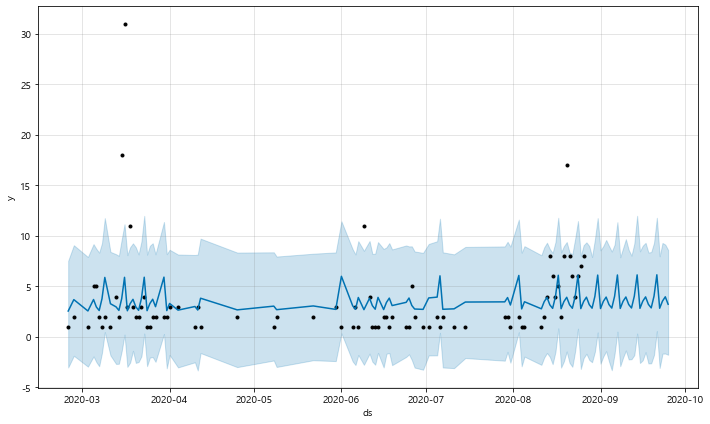

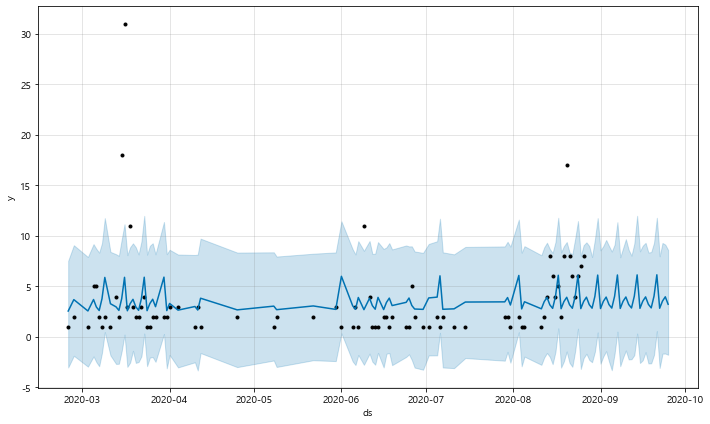

In [32]:
m1_성남시.plot(forecast1_성남시)

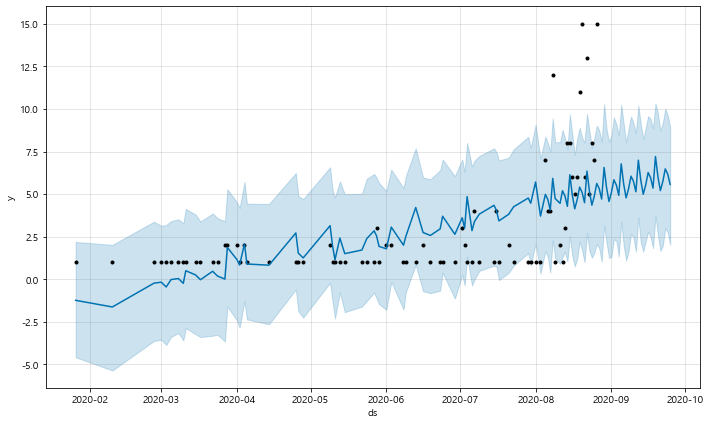

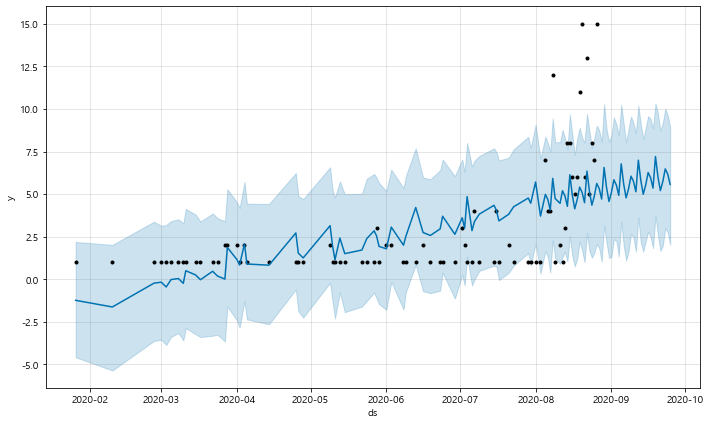

In [33]:
m1_고양시.plot(forecast1_고양시)

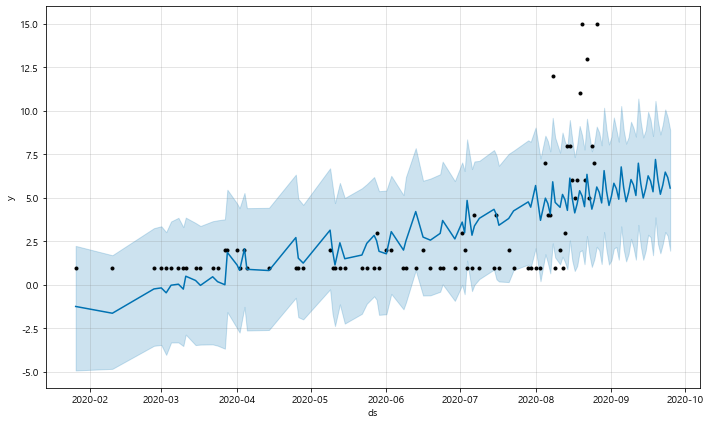

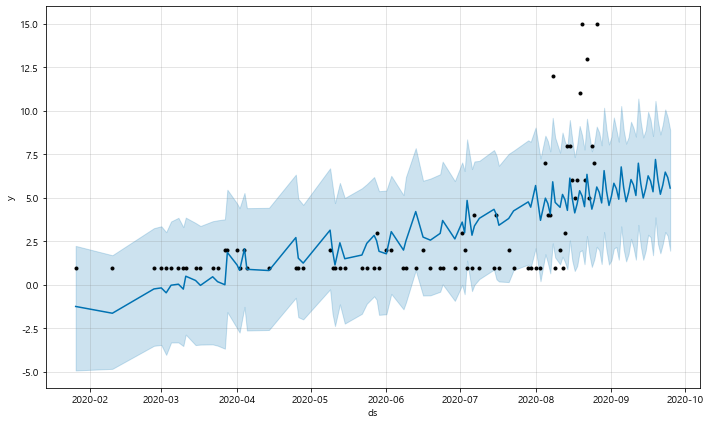

In [34]:
m3_고양시.plot(forecast3_고양시)